### Gender Recognition by voice

## Problem Statement:
- Gender Recognition by voice

- This database was created to identify a voice as male or female, based upon acoustic properties of the voice. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in Python using the seewave and Python packages, with an analyzed frequency range of 0hz-280hz.
- The voiced speech of a typical adult male will have a fundamental frequency from 85 to 180 Hz, and that of a typical adult female from 165 to 255 Hz.

### The best model achieves 99% accuracy on the test set. According to a CART model, 
- it appears that looking at the mean fundamental frequency might be enough to accurately classify a voice. However, some male voices use a higher frequency, even though their resonance differs from female voices, and may be incorrectly classified as female. To the human ear, there is apparently more than simple frequency,that determines a voice's gender

### Dataset Collection
- Collected data from: https://www.kaggle.com/primaryobjects/voicegender

## Features Information:
- The following acoustic properties of each voice are measured and included within the CSV:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

In [29]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
## Read the data
data=pd.read_csv("C:/Users/lenovo/Desktop/summer internship/voice.csv")
data.head(10) # print the first 10 rows of a DataFrame

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [31]:
# read shape
data.shape

(3168, 21)

In [32]:
## looking at the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [33]:
# Reading the columns name 
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [34]:
## checking the dataset all information
## Return the desciptin only for the numiracal column
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [35]:
## Return the description only for the caterigical column
data.describe(include=['object'])

,label
count,3168
unique,2
top,female
freq,1584


In [36]:
# Traget value
data['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

### Data Visualation

In [37]:
## checking the null value from the dataset
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

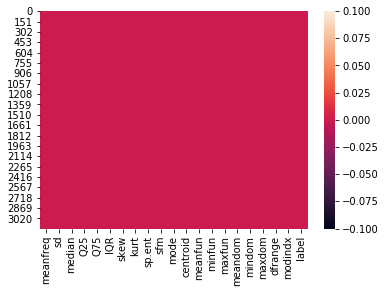

In [38]:
## Visualizing the missing value with heat map
sns.heatmap(data.isna())

female    1584
male      1584
Name: label, dtype: int64


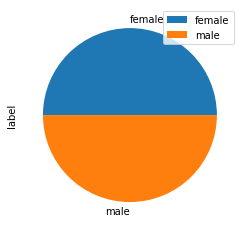

In [39]:
#distibution of target variable
data.label.value_counts().plot.pie().legend()
print(data['label'].value_counts())


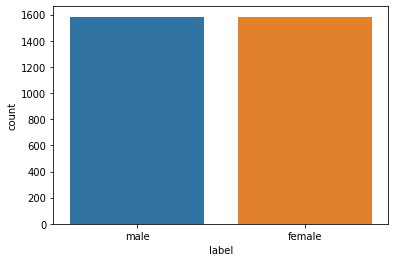

In [40]:
# visulize the target data use of countplot
sns.countplot(data['label'])

In [41]:
# checking the correlation
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


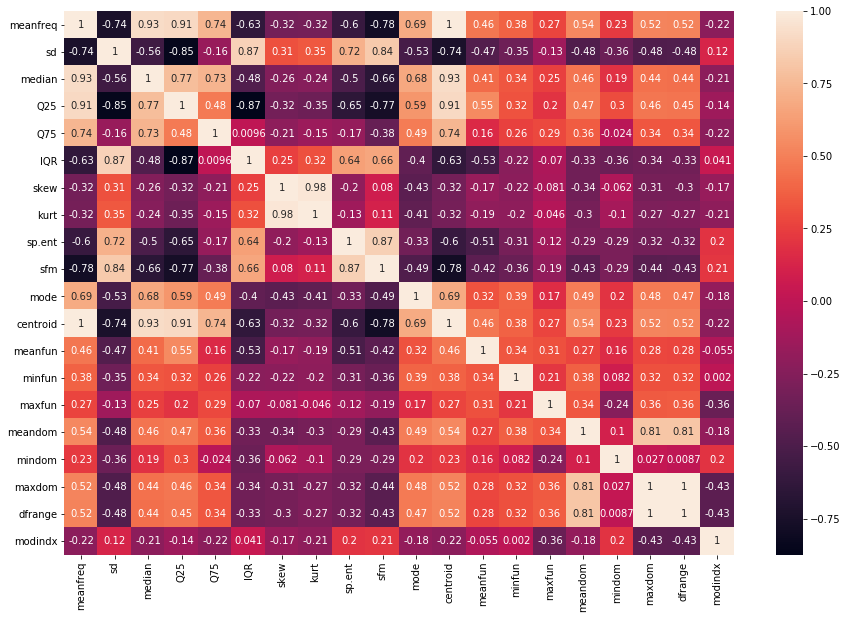

In [42]:
## visualize the correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

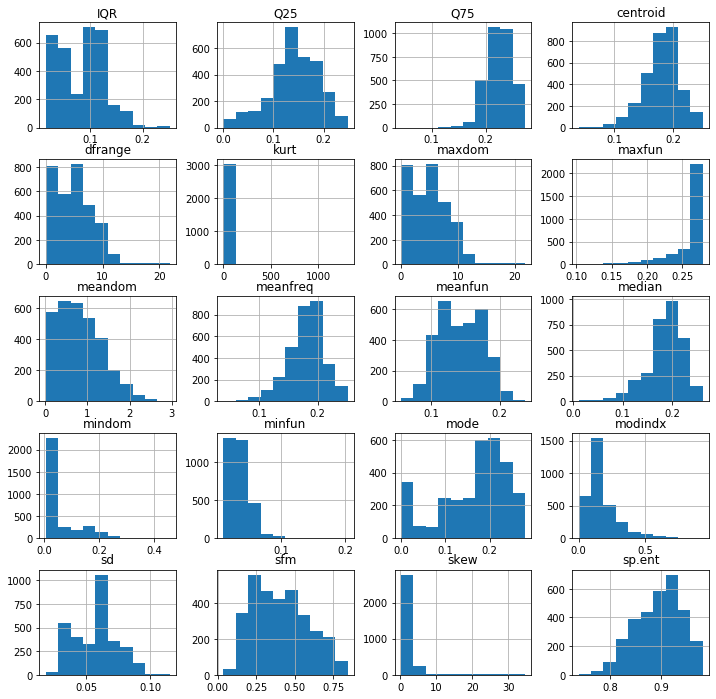

In [43]:
#hist--> it is only work on numirical data or continious
 
data.hist(figsize=(12,12))
plt.show()

## Data Cleaning

In [44]:
# copy the actual data in another varible name
data_new=data.copy()

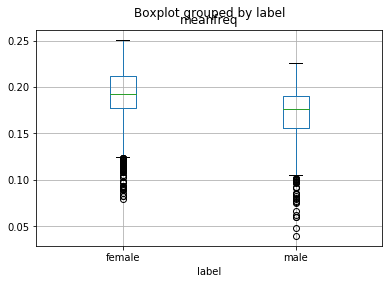

In [45]:
# boxplot see comprasion in labels
data_new.boxplot(column='meanfreq',by='label',grid=None)

In [46]:
y=data_new.label

In [47]:
# drop the Column Curt,Centroid,label and dfrange
# in the column correlation
data_new.drop(['kurt','centroid','dfrange','label'],axis=1,inplace=True)

### The voiced speech of a typical adult male will have a fundamental frequency from 85 to 180 Hz, and that of a typical adult female from 165 to 255 Hz.

In [48]:
# remove outlier using male and female voice frequency
male_freq=data_new[((data_new['meanfun']<0.085) | (data_new['meanfun']>0.180)) &
                            (data['label']=='male')].index
female_freq=data_new[((data_new['meanfun']<0.165) | (data_new['meanfun']>0.255)) &
                     (data['label']=='female')].index

In [49]:
label_new=list(male_freq)+list(female_freq)
len(label_new)

710

In [50]:
## Take input
new_x=data_new.drop(label_new,axis=0)

In [51]:
## target value
new_y=pd.Series(y).drop(label_new,axis=0)

## Applying Models :

### Logistic Regression Model :

In [52]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=1)
# Fit the Train data on Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [53]:
#predict train data
pred=lr.predict(X_train)

# check accuracy for train data
from sklearn.metrics import accuracy_score
log_reg= accuracy_score(pred,y_train)
log_reg

0.9237029501525941

In [54]:
# predict Test data
test_pred=lr.predict(X_test)

# check accuracy for Test data
Test_log_reg=accuracy_score(test_pred,y_test)
Test_log_reg

0.9329268292682927

### Random Forest Classifier Model :¶


In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

pred = rfc.predict(X_train)
# accuracy for Train data
rfc_score = accuracy_score(pred, y_train)
rfc_score

1.0

In [56]:
# checking Accuracy for Test data
test_pred=rfc.predict(X_test)
test_rfc_score=accuracy_score(test_pred,y_test)
test_rfc_score

0.9979674796747967

### K-Nearest Neighbours Model :

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_train)
# accuracy for Train data
knn_score = accuracy_score(pred,y_train)
knn_score

0.8779247202441506

In [58]:
# checking Accuracy for Test data
test_pred=knn.predict(X_test)
test_knn_score=accuracy_score(test_pred,y_test)
test_knn_score

0.8516260162601627

### Decision Tree Classifier Model :

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pred = dtc.predict(X_train)
# accuracy for Train data
dtc_score = accuracy_score(pred,y_train)
dtc_score

1.0

In [60]:
# checking Accuracy for Test data
test_pred=dtc.predict(X_test)
test_dtc_score=accuracy_score(test_pred,y_test)
test_dtc_score

0.9939024390243902

### use of ROC and ROC-AUC Curve

In [70]:
# Pridict the prob of a tumour being being or Malignant
# Pridict -->give you the predicted value(B or M )
#predict_proba--->gives you the probability associated with B and Probability
# Syntax: objectname.predict_proba(Input values)
y_test_prob=rfc.predict_proba(X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.00,1.00
1,1.00,0.00
2,1.00,0.00
3,0.03,0.97
4,0.00,1.00
...,...,...
487,0.00,1.00
488,0.99,0.01
489,0.00,1.00
490,0.00,1.00


In [81]:
# roc_curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob=rfc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,m_prob,pos_label='male')

In [82]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03208556, 0.04812834, 0.05882353,
       0.0855615 , 0.09625668, 0.12299465, 0.15508021, 0.17647059,
       0.24064171, 0.36363636, 1.        ])

In [83]:
tpr

array([0.        , 0.78688525, 0.86557377, 0.90491803, 0.92131148,
       0.93442623, 0.96065574, 0.96393443, 0.9704918 , 0.97377049,
       0.98688525, 0.99672131, 0.99672131, 0.99672131, 0.99672131,
       0.99672131, 0.99672131, 0.99672131, 0.99672131, 0.99672131,
       0.99672131, 1.        , 1.        ])

In [84]:
threshold

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.92, 0.91, 0.9 , 0.88, 0.86,
       0.69, 0.13, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.04, 0.03, 0.02, 0.01,
       0.  ])

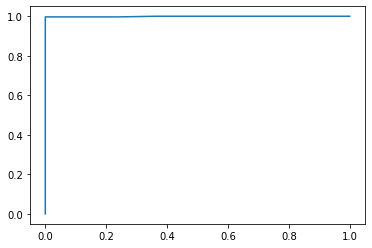

In [85]:
plt.plot(fpr,tpr)

In [76]:
# use of roc_auc_score
roc_auc_score(y_test,m_prob)

0.9990093802051372

## Conclusion :

In [ ]:
fin_res = {'Models' : ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree Classifier', 'Random Forest Classifier'], 
'Train_Acc_Score': [log_reg, knn_score, dtc_score, rfc_score],
           'Test_Acc_Score':[Test_log_reg,test_knn_score,test_dtc_score,test_rfc_score]}

nums=[1, 2, 3, 4]

conclusion = pd.DataFrame(fin_res, index=nums)
conclusion

### We find the good model Random Forest Classifier and Decision Tree Classifier for this data